In [77]:
import pandas as pd

df = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df.shape

(7043, 21)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [82]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [83]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
df.drop(columns="customerID", inplace=True)

In [85]:
for col in df.columns:
    if col == "customerID":
        continue
    print("Column Name:", col)
    print(df[col].value_counts())
    print("-" * 30) 

Column Name: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
Column Name: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------
Column Name: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Column Name: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
Column Name: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
Column Name: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------
Column Name: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------
Column Name: InternetService
InternetServic

In [86]:
mappings = {
    "gender": {"Male": 0, "Female": 1},
    "Partner": {"No": 0, "Yes": 1},
    "Dependents": {"No": 0, "Yes": 1},
    "PhoneService": {"No": 0, "Yes": 1},
    "MultipleLines": {"No": 0, "Yes": 1, "No phone service": 2},
    "InternetService": {"Fiber optic": 0, "DSL": 1, "No": 2},
    "OnlineSecurity": {"No": 0, "Yes": 1, "No internet service": 2},
    "OnlineBackup": {"No": 0, "Yes": 1, "No internet service": 2},
    "DeviceProtection": {"No": 0, "Yes": 1, "No internet service": 2},
    "TechSupport": {"No": 0, "Yes": 1, "No internet service": 2},
    "StreamingTV": {"No": 0, "Yes": 1, "No internet service": 2},
    "StreamingMovies": {"No": 0, "Yes": 1, "No internet service": 2},
    "Contract": {"Month-to-month": 0, "One year": 1, "Two year": 2},    
    "PaperlessBilling": {"No": 0, "Yes": 1},
    "PaymentMethod": {"Electronic check" : 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3},
    "Churn": {"No": 0, "Yes": 1}
}

df.replace(mappings, inplace=True)
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_70504\2025083932.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mappings, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>],
       [<Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'PaperlessBilling'}>],
       [<Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

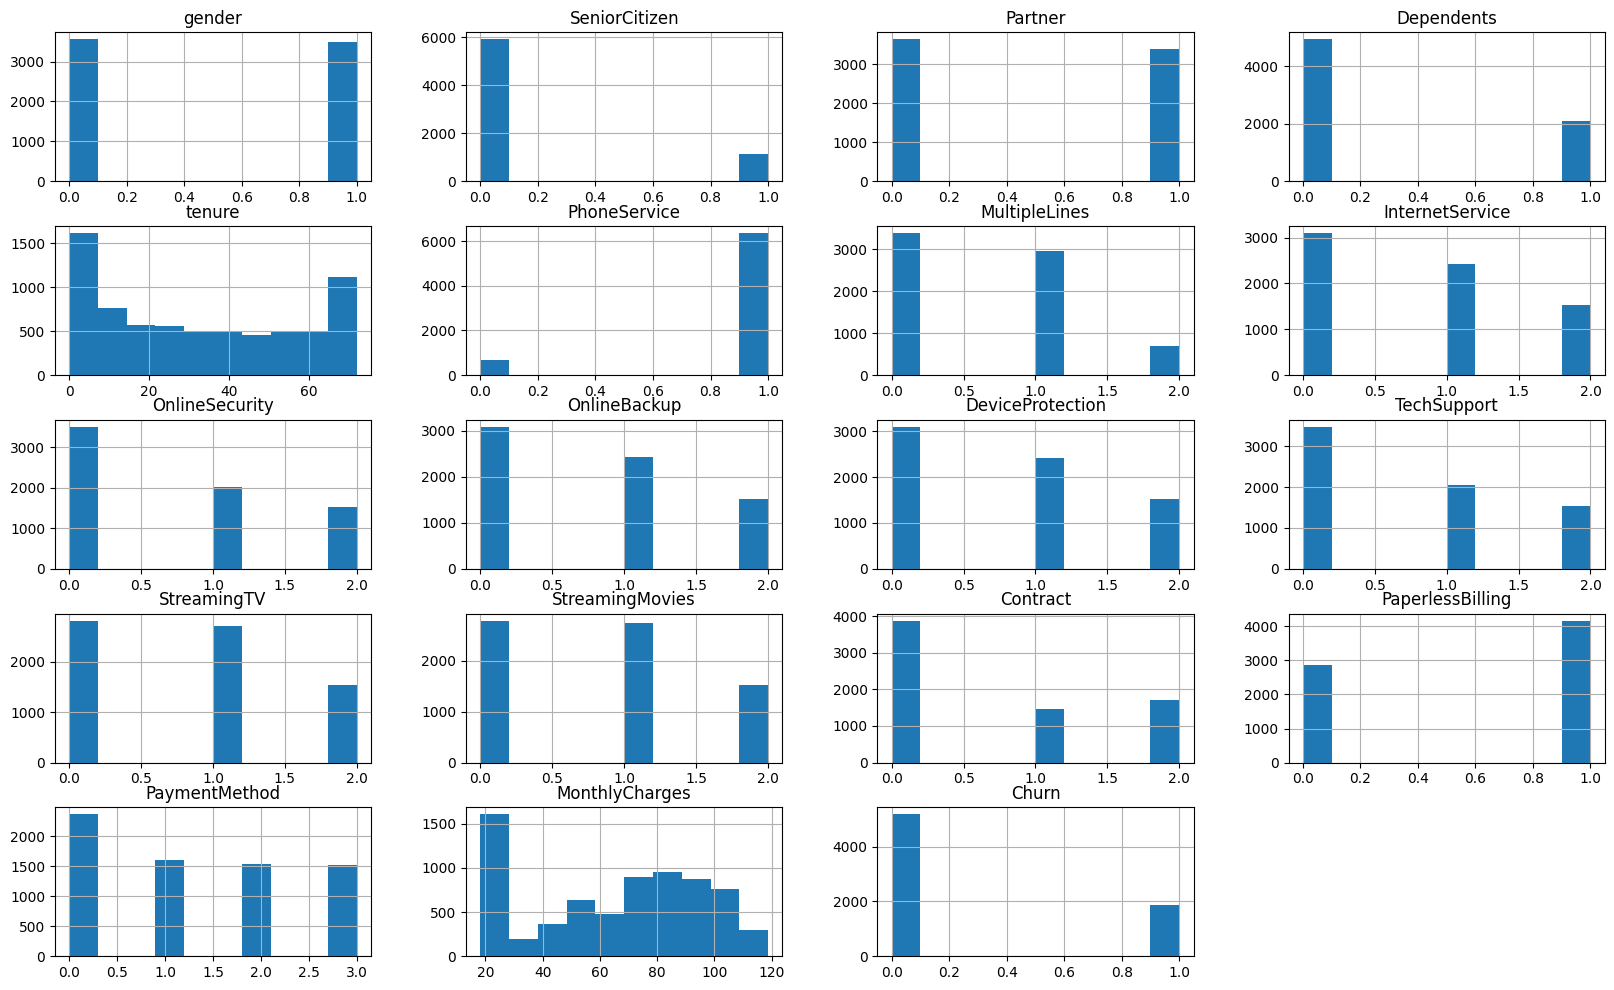

In [87]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,12))

In [88]:
for column in df.columns:
    if df[column].dtype == 'object':  
        count_empty_strings = df[column].str.match(r'^\s*$').sum() 
        if count_empty_strings > 0:
            print(f"Column '{column}' has {count_empty_strings} rows with only spaces.")

Column 'TotalCharges' has 11 rows with only spaces.


In [89]:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', float('nan'), regex=True)

df = df.dropna(subset=['TotalCharges'])

In [90]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [91]:
#Tenure, MonthlyCharges, TotalCharges
from sklearn.preprocessing import StandardScaler

numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,-1.280248,0,2,1,0,1,0,0,0,0,0,1,0,-1.161694,-0.994194,0
1,0,0,0,0,0.064303,1,0,1,1,0,1,0,0,0,1,0,1,-0.260878,-0.173740,0
2,0,0,0,0,-1.239504,1,0,1,1,1,0,0,0,0,0,1,1,-0.363923,-0.959649,1
3,0,0,0,0,0.512486,0,2,1,1,0,1,1,0,0,1,0,2,-0.747850,-0.195248,0
4,1,0,0,0,-1.239504,1,0,0,0,0,0,0,0,0,0,1,0,0.196178,-0.940457,1


In [92]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis = 1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [95]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(shuffle=True)
model = DecisionTreeClassifier(random_state=42)

val_scores = cross_val_score(X=X_train_smote, y=y_train_smote, estimator=model, cv=skf)
val_scores

array([0.7835408 , 0.77109267, 0.78838174, 0.76816609, 0.77577855])

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7132701421800948
Precision: 0.5614973262032086
Recall: 0.46735905044510384
F1 Score: 0.5101214574898786
